In [ ]:
# PROJECT CODE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
banknotes_data = pd.read_csv('banknotes_comp.csv')
banknotes_data

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


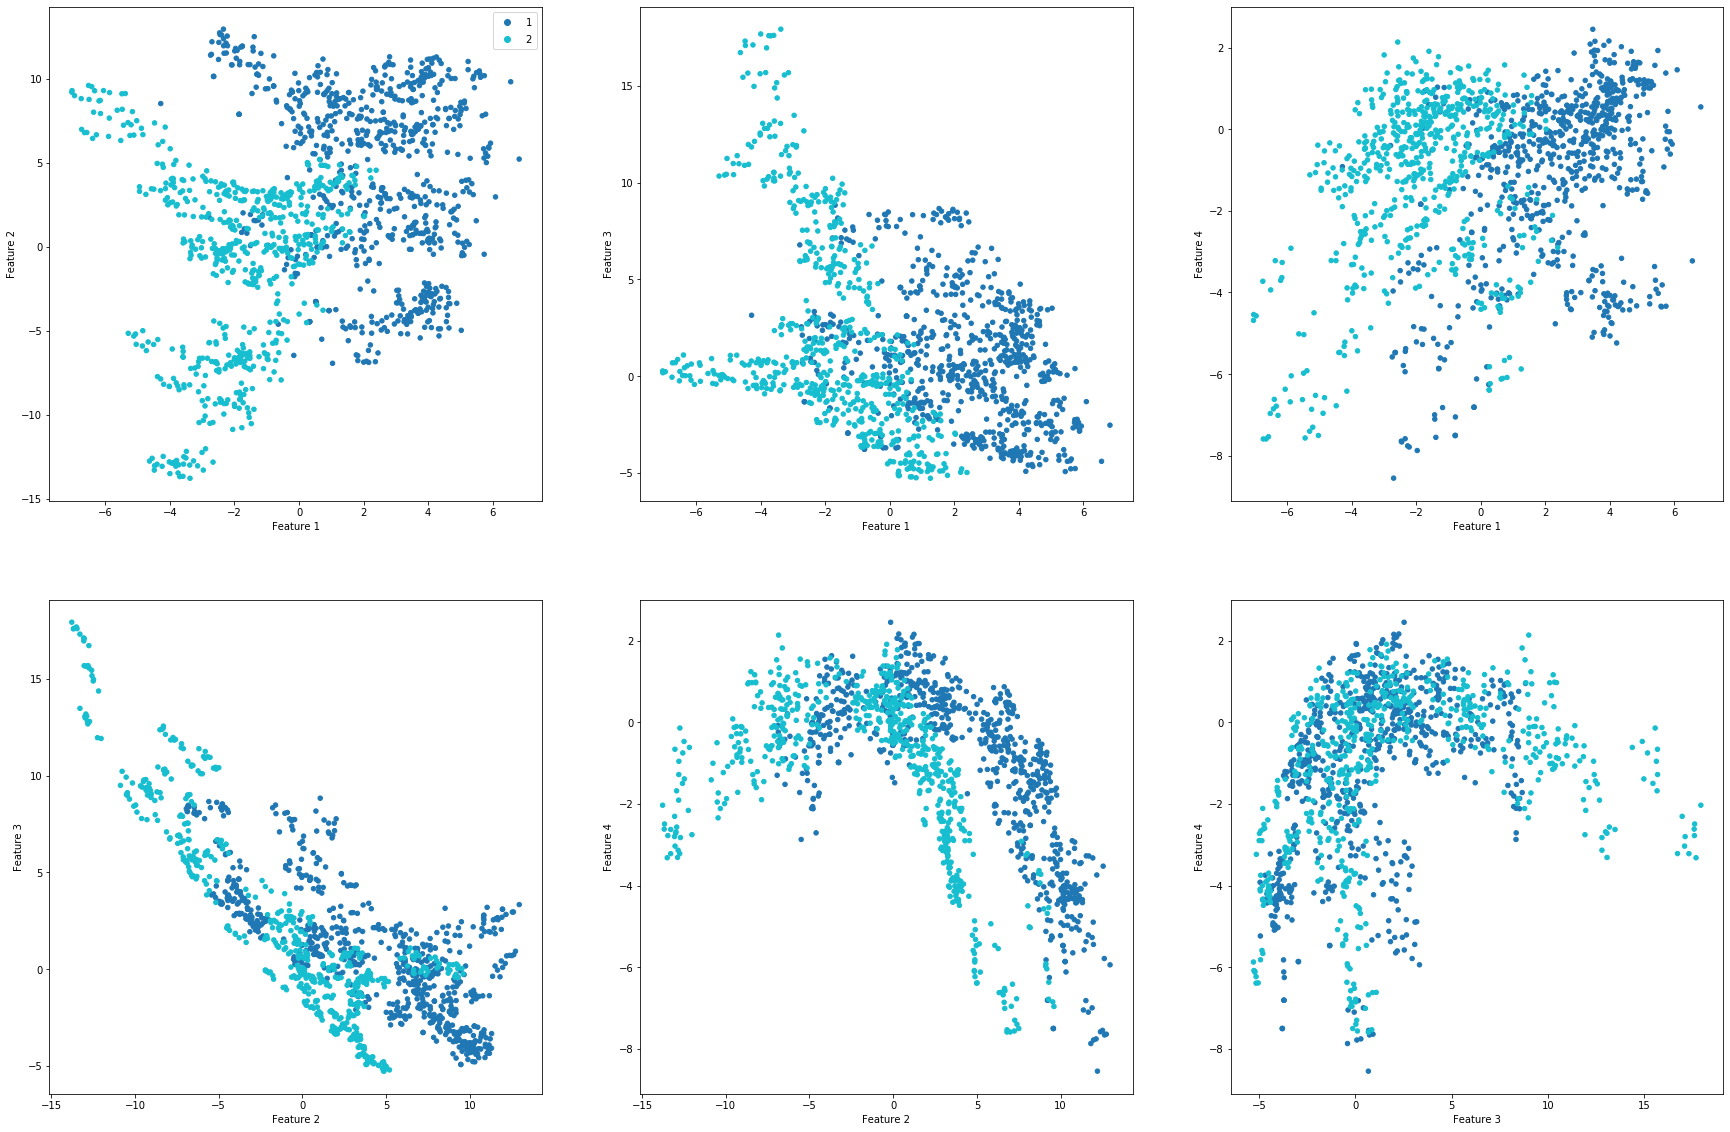

In [3]:
# Visualising various columns/ features of dataset to pick best features for K-Means
fig, axs = plt.subplots(2, 3, figsize=(30,20))

scatter=axs[0,0].scatter(banknotes_data['V1'], banknotes_data['V2'], c=banknotes_data['Class'], s=20, cmap="tab10")
legend = axs[0,0].legend(*scatter.legend_elements())
axs[0,0].set_xlabel("Feature 1")
axs[0,0].set_ylabel("Feature 2")

axs[0,1].scatter(banknotes_data['V1'], banknotes_data['V3'], c=banknotes_data['Class'], s=20, cmap="tab10")
axs[0,1].set_xlabel("Feature 1")
axs[0,1].set_ylabel("Feature 3")

axs[0,2].scatter(banknotes_data['V1'], banknotes_data['V4'], c=banknotes_data['Class'], s=20, cmap="tab10")
axs[0,2].set_xlabel("Feature 1")
axs[0,2].set_ylabel("Feature 4")

axs[1,0].scatter(banknotes_data['V2'], banknotes_data['V3'], c=banknotes_data['Class'], s=20, cmap="tab10")
axs[1,0].set_xlabel("Feature 2")
axs[1,0].set_ylabel("Feature 3")

axs[1,1].scatter(banknotes_data['V2'], banknotes_data['V4'], c=banknotes_data['Class'], s=20, cmap="tab10")
axs[1,1].set_xlabel("Feature 2")
axs[1,1].set_ylabel("Feature 4")

axs[1,2].scatter(banknotes_data['V3'], banknotes_data['V4'], c=banknotes_data['Class'], s=20, cmap="tab10")
axs[1,2].set_xlabel("Feature 3")
axs[1,2].set_ylabel("Feature 4")

plt.show()

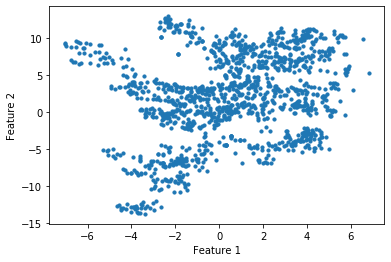

In [4]:
# Its evident that first plot is best suited for K-Means clustering. 
# Hence, we pick Features 1 and 2 for our clustering.
# Exploratory Data Analysis for V1 & V2
plt.scatter(banknotes_data['V1'], banknotes_data['V2'], s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Data Statistics
v1_mean = np.mean(banknotes_data['V1'])
v1_std = np.std(banknotes_data['V1'])
v2_mean = np.mean(banknotes_data['V2'])
v2_std = np.std(banknotes_data['V2'])

print("Feature 1: Mean =", '%.3f'%v1_mean, " Std deviation =", '%.3f'%v1_std)
print("Feature 2: Mean =", '%.3f'%v2_mean, " Std deviation =", '%.3f'%v2_std)

Feature 1: Mean = 0.434  Std deviation = 2.842
Feature 2: Mean = 1.922  Std deviation = 5.867


In [6]:
# Applying K-Means
kmeans_results = KMeans(n_clusters=2).fit(banknotes_data)
clusters = kmeans_results.cluster_centers_
labels = kmeans_results.labels_

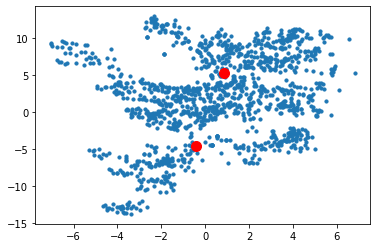

In [7]:
# Plotting Results & Visualisations
# 1 CLUSTER CENTERS
plt.scatter(banknotes_data['V1'], banknotes_data['V2'], s=10)
plt.scatter(clusters[:,0], clusters[:,1], c="red", s=100)
plt.show()

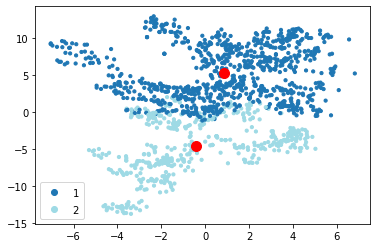

In [9]:
# 2 CLUSTERS ALONG WITH LABELS
scatter = plt.scatter(banknotes_data['V1'], banknotes_data['V2'], c=labels+1, s=10, cmap="tab20")
legend = plt.legend(*scatter.legend_elements())
plt.scatter(clusters[:,0], clusters[:,1], s=100, c="red")
plt.show()

In [10]:
# The K Means algorithm has successfully clustered the data points into 2 clusters, 
# one presumably for the real currency notes, and the other for fake notes.

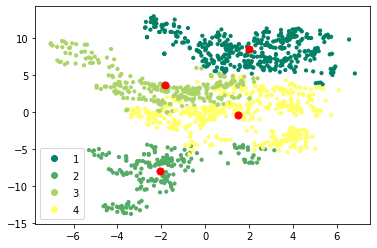

In [17]:
# We tried to apply K Means to form 4 clusters as well. 
kmeans_res_2 = KMeans(n_clusters=4).fit(banknotes_data)
clusters_2 = kmeans_res_2.cluster_centers_

scatter=plt.scatter(banknotes_data['V1'], banknotes_data['V2'], c=kmeans_res_2.labels_+1, s=10, cmap="summer")
legend1 = plt.legend(*scatter.legend_elements())
plt.scatter(clusters_2[:,0], clusters_2[:,1], s=50, c="red")
plt.show()

In [18]:
# The advantage that this serves is that we can split our clusters into 4 categories: 
# 1: Definitely Real Notes
# 2: Definitely Fake Notes
# 3: Possibly Fake Notes
# 4: Possibly Real Notes

In [19]:
# This makes our analysis more reliable and closer to real-life scenario/ situation.